<a href="https://colab.research.google.com/github/mcfardc/AERO-7970/blob/main/HW2_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 2 Problem 5

This code solves for the methane kinetics reacting with air at constant pressure and enthalpy

It also solves for ethane kinetics at various volume percentages

In [23]:
!pip install cantera
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# Methane kinetics at 1100 K and 1 atm
Fuel is 1% volume methane and 99 % volume nitrogen

Phi is 0.2


  gri30:

       temperature   1100 K
          pressure   1.0132e+05 Pa
           density   0.35036 kg/m^3
  mean mol. weight   31.625 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        8.2327e+05        2.6036e+07  J
   internal energy        5.3407e+05         1.689e+07  J
           entropy            7845.1         2.481e+05  J/K
    Gibbs function       -7.8063e+06       -2.4687e+08  J
 heat capacity c_p            1111.2             35142  J/K
 heat capacity c_v            848.29             26827  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.91982           0.90909           -26.928
               CH4        0.00046117        0.00090909           -40.834
                N2          0.079724              0.09           -27.51

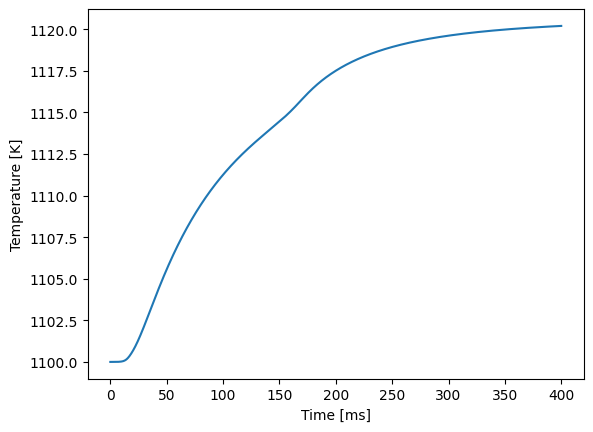

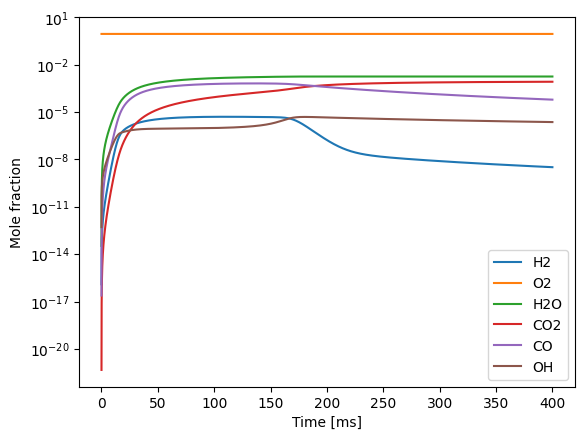

Maximum OH concentration: 4.988191616936914e-06
Ignition delay time: 180.22000000003945 ms


In [50]:
gas = ct.Solution('gri30.yaml')
phi = 0.2
gas.TPX = 1100, 101325, f'CH4:{.01} , O2:{2/phi}, N2:{.99}'
gas()

reactor = ct.IdealGasConstPressureReactor(gas)
sim = ct.ReactorNet([reactor])
dt_max = 1e-5
t_end = 40000*dt_max
states = ct.SolutionArray(gas, extra=['t'])
while sim.time < t_end:
    sim.advance(sim.time + dt_max)
    states.append(reactor.thermo.state, t=sim.time*1e3)

# Plot the output
plt.plot(states.t, states.T)
plt.xlabel('Time [ms]')
plt.ylabel('Temperature [K]')
plt.show()

species_names = 'H2', 'O2', 'H2O', 'CO2','CO','OH'

for species in species_names:
    plt.semilogy(states.t, states.X[:,gas.species_index(species)], label = species)
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel('Mole fraction')
plt.show()

max_OH = np.max(states.X[:,gas.species_index('OH')])
print('Maximum OH concentration: ' + str(max_OH))
max_OH_index = np.argmax(states.X[:,gas.species_index('OH')])
Ignition_time = states.t[max_OH_index]
print('Ignition delay time: ' + str(Ignition_time) + ' ms')

# Ethane kinetics at 1100 K and 1 atm
Fuel is ethane and nitrogen

Ethane volume % is varied from 1% - 5%

Phi is 0.2

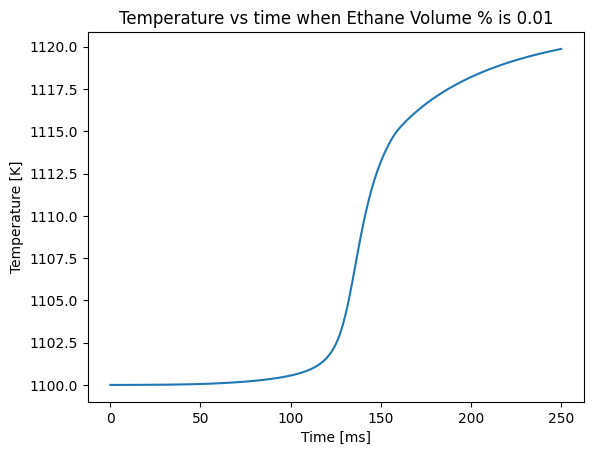

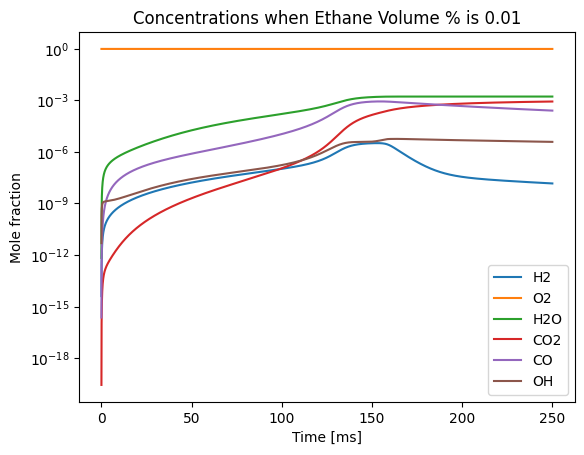

Maximum OH concentration: 5.617834364195216e-06at ethane volume % of 0.01
Ignition delay time: 163.760000000023 ms at ethane volume % of 0.01


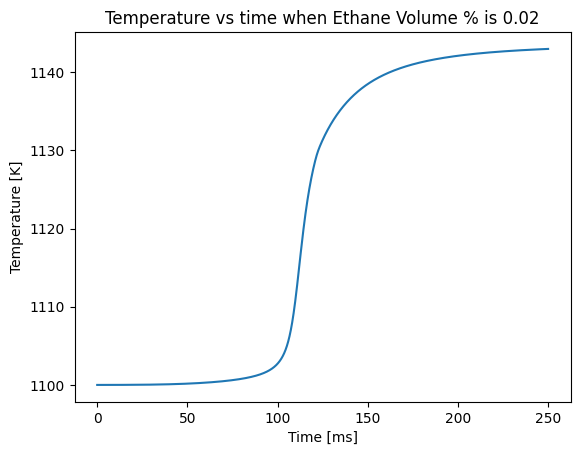

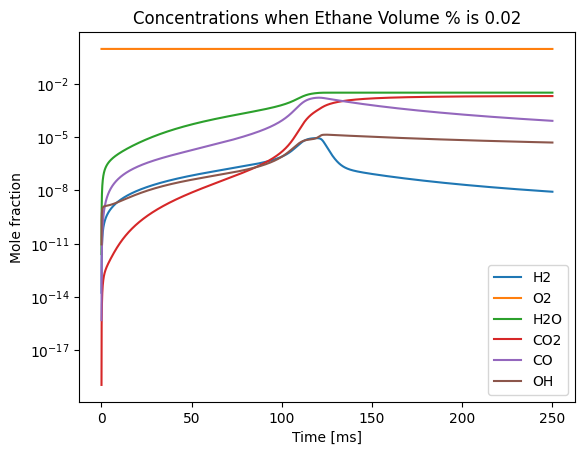

Maximum OH concentration: 1.3770159348257747e-05at ethane volume % of 0.02
Ignition delay time: 124.63999999998437 ms at ethane volume % of 0.02


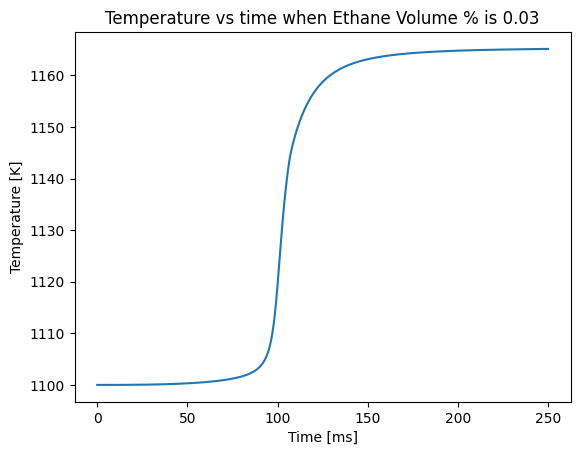

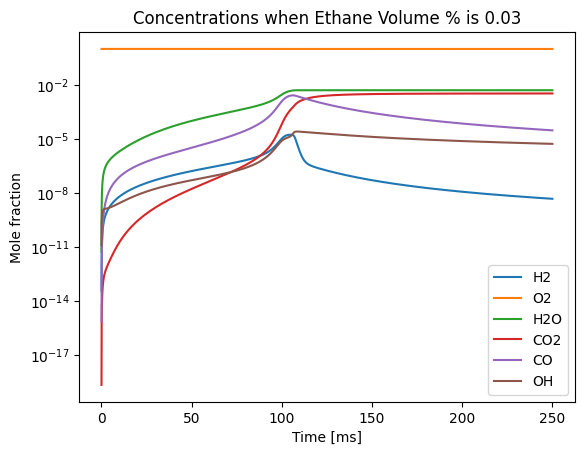

Maximum OH concentration: 2.4888965877183823e-05at ethane volume % of 0.03
Ignition delay time: 108.55999999999061 ms at ethane volume % of 0.03


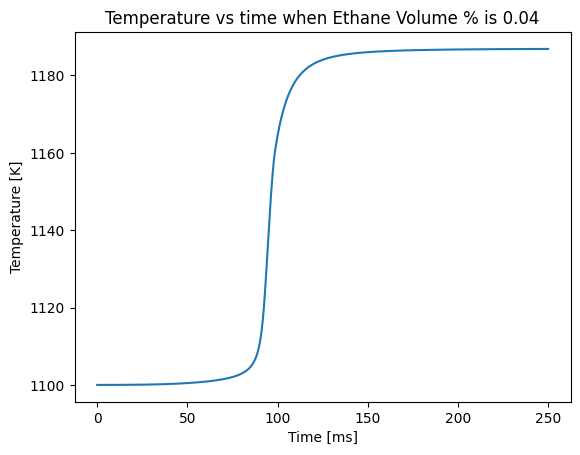

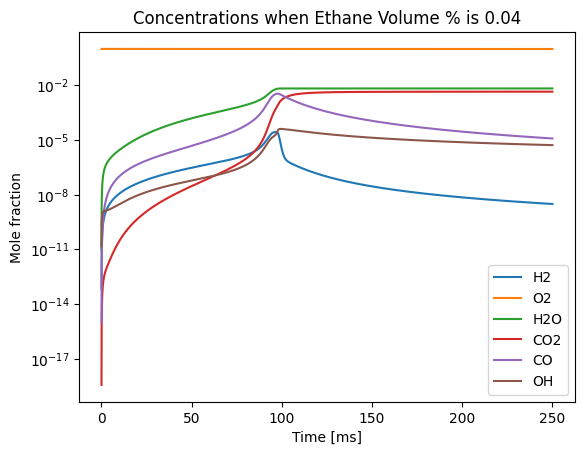

Maximum OH concentration: 3.9399794024741845e-05at ethane volume % of 0.04
Ignition delay time: 99.3199999999942 ms at ethane volume % of 0.04


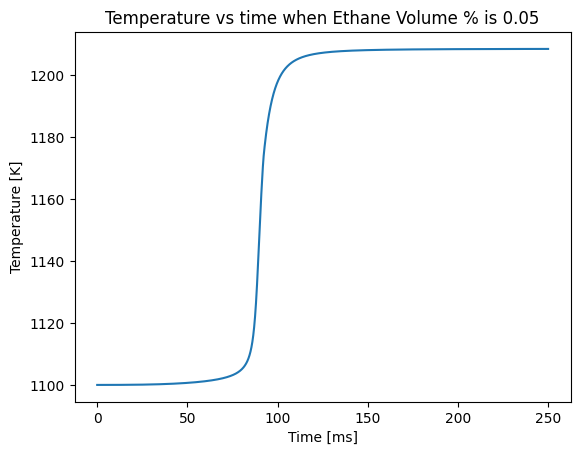

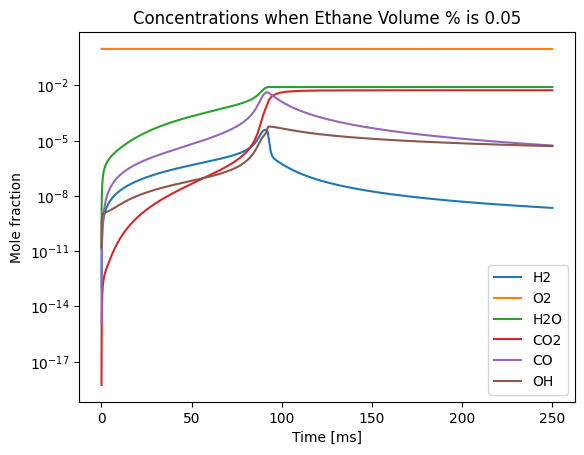

Maximum OH concentration: 5.775191379308779e-05at ethane volume % of 0.05
Ignition delay time: 93.15999999999659 ms at ethane volume % of 0.05


In [51]:
gas = ct.Solution('gri30.yaml')
phi = 0.2
x = np.arange(.01,.06,.01)
for i in x:
  C2H6 = i
  N2 = 1-i
  gas.TPX = 1100, 101325, f'C2H6:{C2H6}, O2:{3.5/phi}, N2:{N2}'
  gas.HP = None, None
  reactor = ct.IdealGasConstPressureReactor(gas)
  sim = ct.ReactorNet([reactor])
  dt_max = 1e-5
  t_end = 25000*dt_max
  states = ct.SolutionArray(gas, extra=['t'])
  while sim.time < t_end:
      sim.advance(sim.time + dt_max)
      states.append(reactor.thermo.state, t=sim.time*1e3)


  # Plot the output
  plt.plot(states.t, states.T)
  plt.title('Temperature vs time when Ethane Volume % is ' + str(i))
  plt.xlabel('Time [ms]')
  plt.ylabel('Temperature [K]')
  plt.show()

  species_names = 'H2', 'O2', 'H2O', 'CO2','CO','OH'

  for species in species_names:
      plt.semilogy(states.t, states.X[:,gas.species_index(species)], label = species)
  plt.legend()
  plt.xlabel('Time [ms]')
  plt.ylabel('Mole fraction')
  plt.title('Concentrations when Ethane Volume % is ' + str(i))
  plt.show()

  max_OH = np.max(states.X[:,gas.species_index('OH')])
  print('Maximum OH concentration: ' + str(max_OH) + 'at ethane volume % of ' + str(i))
  max_OH_index = np.argmax(states.X[:,gas.species_index('OH')])
  Ignition_time = states.t[max_OH_index]
  print('Ignition delay time: ' + str(Ignition_time) + ' ms at ethane volume % of ' + str(i))